In [1]:
%load_ext load_style
%load_style talk.css
from IPython.display import YouTubeVideo, Image

# [XARRAY](https://github.com/xray/xray)

[xarray](https://github.com/xarray/xarray) (formerly `xray`) has been developed by scientists / engineers working at the [Climate Corporation](http://climate.com/)

It is an open source project and Python package that aims to bring
the labeled data power of [pandas](http://pandas.pydata.org) to the
physical sciences, by providing N-dimensional variants of the core
[pandas](http://pandas.pydata.org) data structures, `Series` and
`DataFrame`: the xray `DataArray` and `Dataset`.

the goal is to provide a pandas-like and pandas-compatible toolkit for
analytics on multi-dimensional arrays, rather than the tabular data for
which pandas excels. The approach adopts the [Common Data
Model](http://www.unidata.ucar.edu/software/thredds/current/netcdf-java/CDM)
for self-describing scientific data in widespread use in the Earth
sciences (e.g., [netCDF](http://www.unidata.ucar.edu/software/netcdf)
and [OPeNDAP](http://www.opendap.org/)): `xray.Dataset` is an in-memory
representation of a netCDF file.

-   HTML documentation: <http://xarray.readthedocs.org>: **really good doc !**
-   Source code: <http://github.com/xarray/xarray>

The main advantages of using [xarray](https://github.com/xarray/xarray) versus [netCDF4](https://github.com/Unidata/netcdf4-python) are: 

+ intelligent selection along **labelled dimensions** (and also indexes)
+ **groupby** operations
+ **resampling** operations
+ data alignment 
+ IO (netcdf)
+ conversion from / to [Pandas.DataFrames](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html)


To install the latest version of xarray (via conda): 

    ᐅ conda install xarray

or if you want the bleeding edge: 


    ᐅ pip install git+https://github.com/xarray/xarray

There's too much to see in the context of this talk, to know more about all the cool **xarray** features, watch: 

PyData talk by **Stefan Hoyer**: <https://www.youtube.com/watch?v=T5CZyNwBa9c>

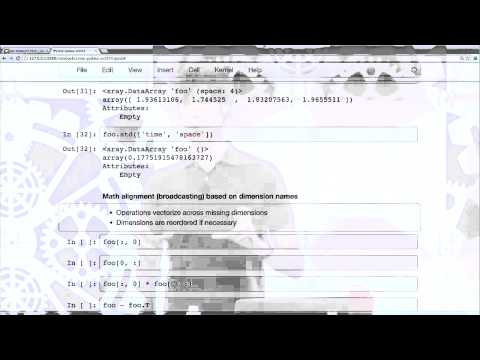

In [2]:
YouTubeVideo('T5CZyNwBa9c', width=500, height=400, start=0)

## Some examples

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap as bm

In [5]:
import xarray as xr; print(xr.__version__)

0.8.2


### Open a netcdf file (ERSST Version 4)

The file (74 Mb) can be downloaded at `ftp://ftp.niwa.co.nz/incoming/fauchereaun/ersst.realtime.nc`

In [6]:
dset = xr.open_dataset('../data/ersst.realtime.nc')

dset is a [xray.Dataset](http://xray.readthedocs.org/en/stable/data-structures.html#dataset), It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

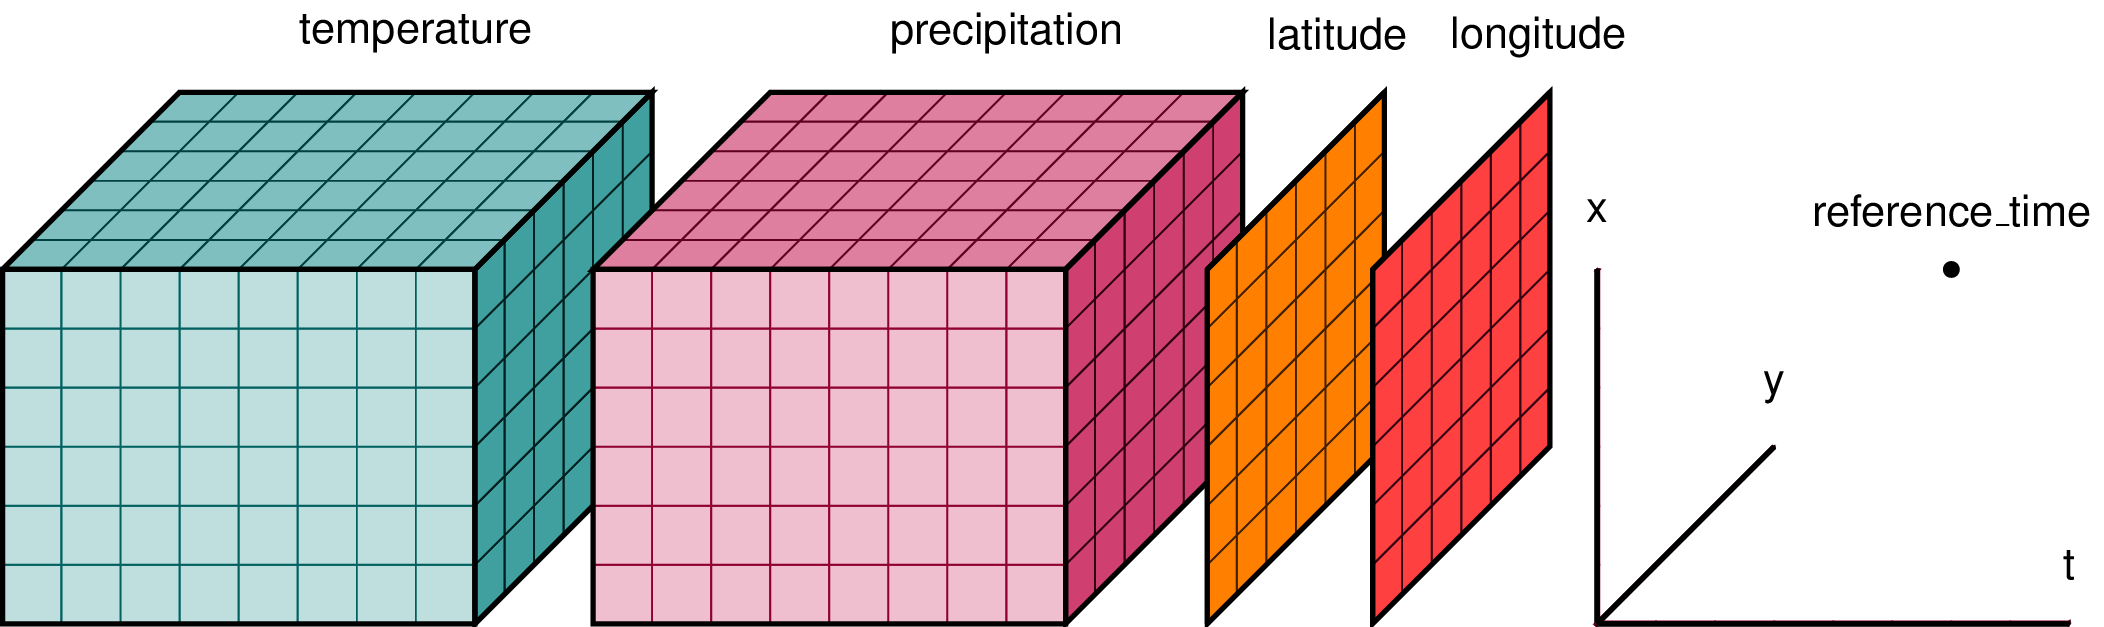

In [7]:
Image('http://xarray.pydata.org/en/stable/_images/dataset-diagram.png', width=700)

In [8]:
dset

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 817, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1948-02-15 1948-03-15 1948-04-15 ...
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    anom     (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    err      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc er

In [9]:
dset.dims.keys()

KeysView(Frozen(SortedKeysDict({'lon': 180, 'lat': 89, 'time': 817, 'zlev': 1})))

In [10]:
dset.dims

Frozen(SortedKeysDict({'lon': 180, 'lat': 89, 'time': 817, 'zlev': 1}))

In [11]:
dset.keys()

KeysView(<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 817, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1948-02-15 1948-03-15 1948-04-15 ...
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    anom     (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    err      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904

### accessing variables

In [12]:
lat = dset['lat']

In [13]:
type(lat)

xarray.core.dataarray.DataArray

In [14]:
lat = dset['lat']
lon = dset['lon']
lons, lats = np.meshgrid(lon, lat)

### selecting a Dataset along dimensions

In [15]:
dset

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 817, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1948-02-15 1948-03-15 1948-04-15 ...
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    anom     (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    err      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc er

In [16]:
dset = dset.sel(zlev=0)

In [17]:
dset

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 817)
Coordinates:
  * time     (time) datetime64[ns] 1948-02-15 1948-03-15 1948-04-15 ...
    zlev     float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    anom     (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    err      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc ersst.194905_ft.nc ersst

In [18]:
dset.sel(time=('1998-1-15'))

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180)
Coordinates:
    time     datetime64[ns] 1998-01-15
    zlev     float32 0.0
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    anom     (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    err      (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc ersst.194905_ft.nc ersst.194906_ft.nc ersst.194907_ft.nc ersst

In [19]:
dset.sel(time=slice('1998-1-15','2000-12-15'), lat=slice(-40,40))

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 180, time: 36)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 1998-03-15 ...
    zlev     float32 0.0
  * lat      (lat) float32 -40.0 -38.0 -36.0 -34.0 -32.0 -30.0 -28.0 -26.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
Data variables:
    sst      (time, lat, lon) float64 13.89 13.81 13.72 13.61 13.56 13.89 ...
    anom     (time, lat, lon) float64 -0.4 -0.47 -0.56 -0.72 -0.89 -0.9 ...
    err      (time, lat, lon) float64 0.35 0.33 0.26 0.26 0.3 0.31 0.2 0.18 ...
Attributes:
    title: ERSST V3b in situ only
    history: Tue Mar 29 09:46:46 2016: /usr/local/bin/ncrcat -O ersst.194802_ft.nc ersst.194803_ft.nc ersst.194804_ft.nc ersst.194805_ft.nc ersst.194806_ft.nc ersst.194807_ft.nc ersst.194808_ft.nc ersst.194809_ft.nc ersst.194810_ft.nc ersst.194811_ft.nc ersst.194812_ft.nc ersst.194901_ft.nc ersst.194902_ft.nc ersst.194903_ft.nc ersst.194904_ft.nc ersst.194905_ft.nc ersst.

#### defines the Basemap projection

In [20]:
m = bm(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,\
            lat_ts=0,resolution='c')

#### defines a function to plot a field (must be 2D)

In [21]:
def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

#### plots 

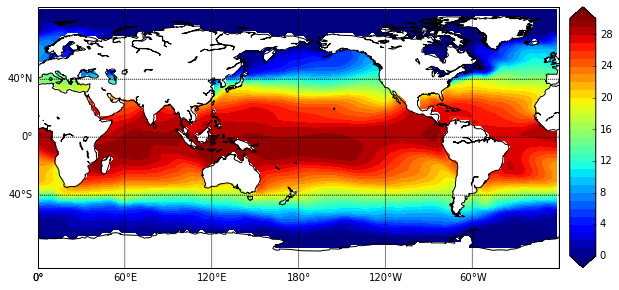

In [22]:
plot_field(dset.sel(time=('1998-1-15'))['sst'], lats, lons, 0, 30, 1, grid=True)

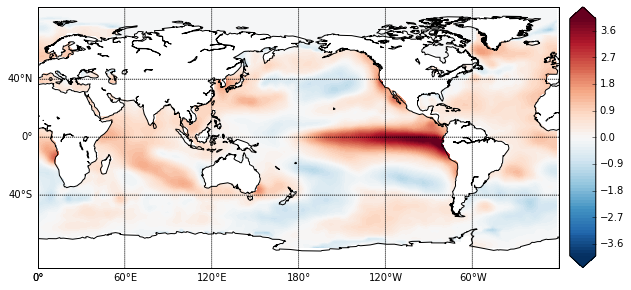

In [23]:
plot_field(dset.sel(time=('1998-1-15'))['anom'], lats, lons, -4, 4, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

In [24]:
mat = dset.sel(lon=slice(0, 10), time=('1998-1-15'))['sst']

### calculates a monthly climatology using the groupby machinery

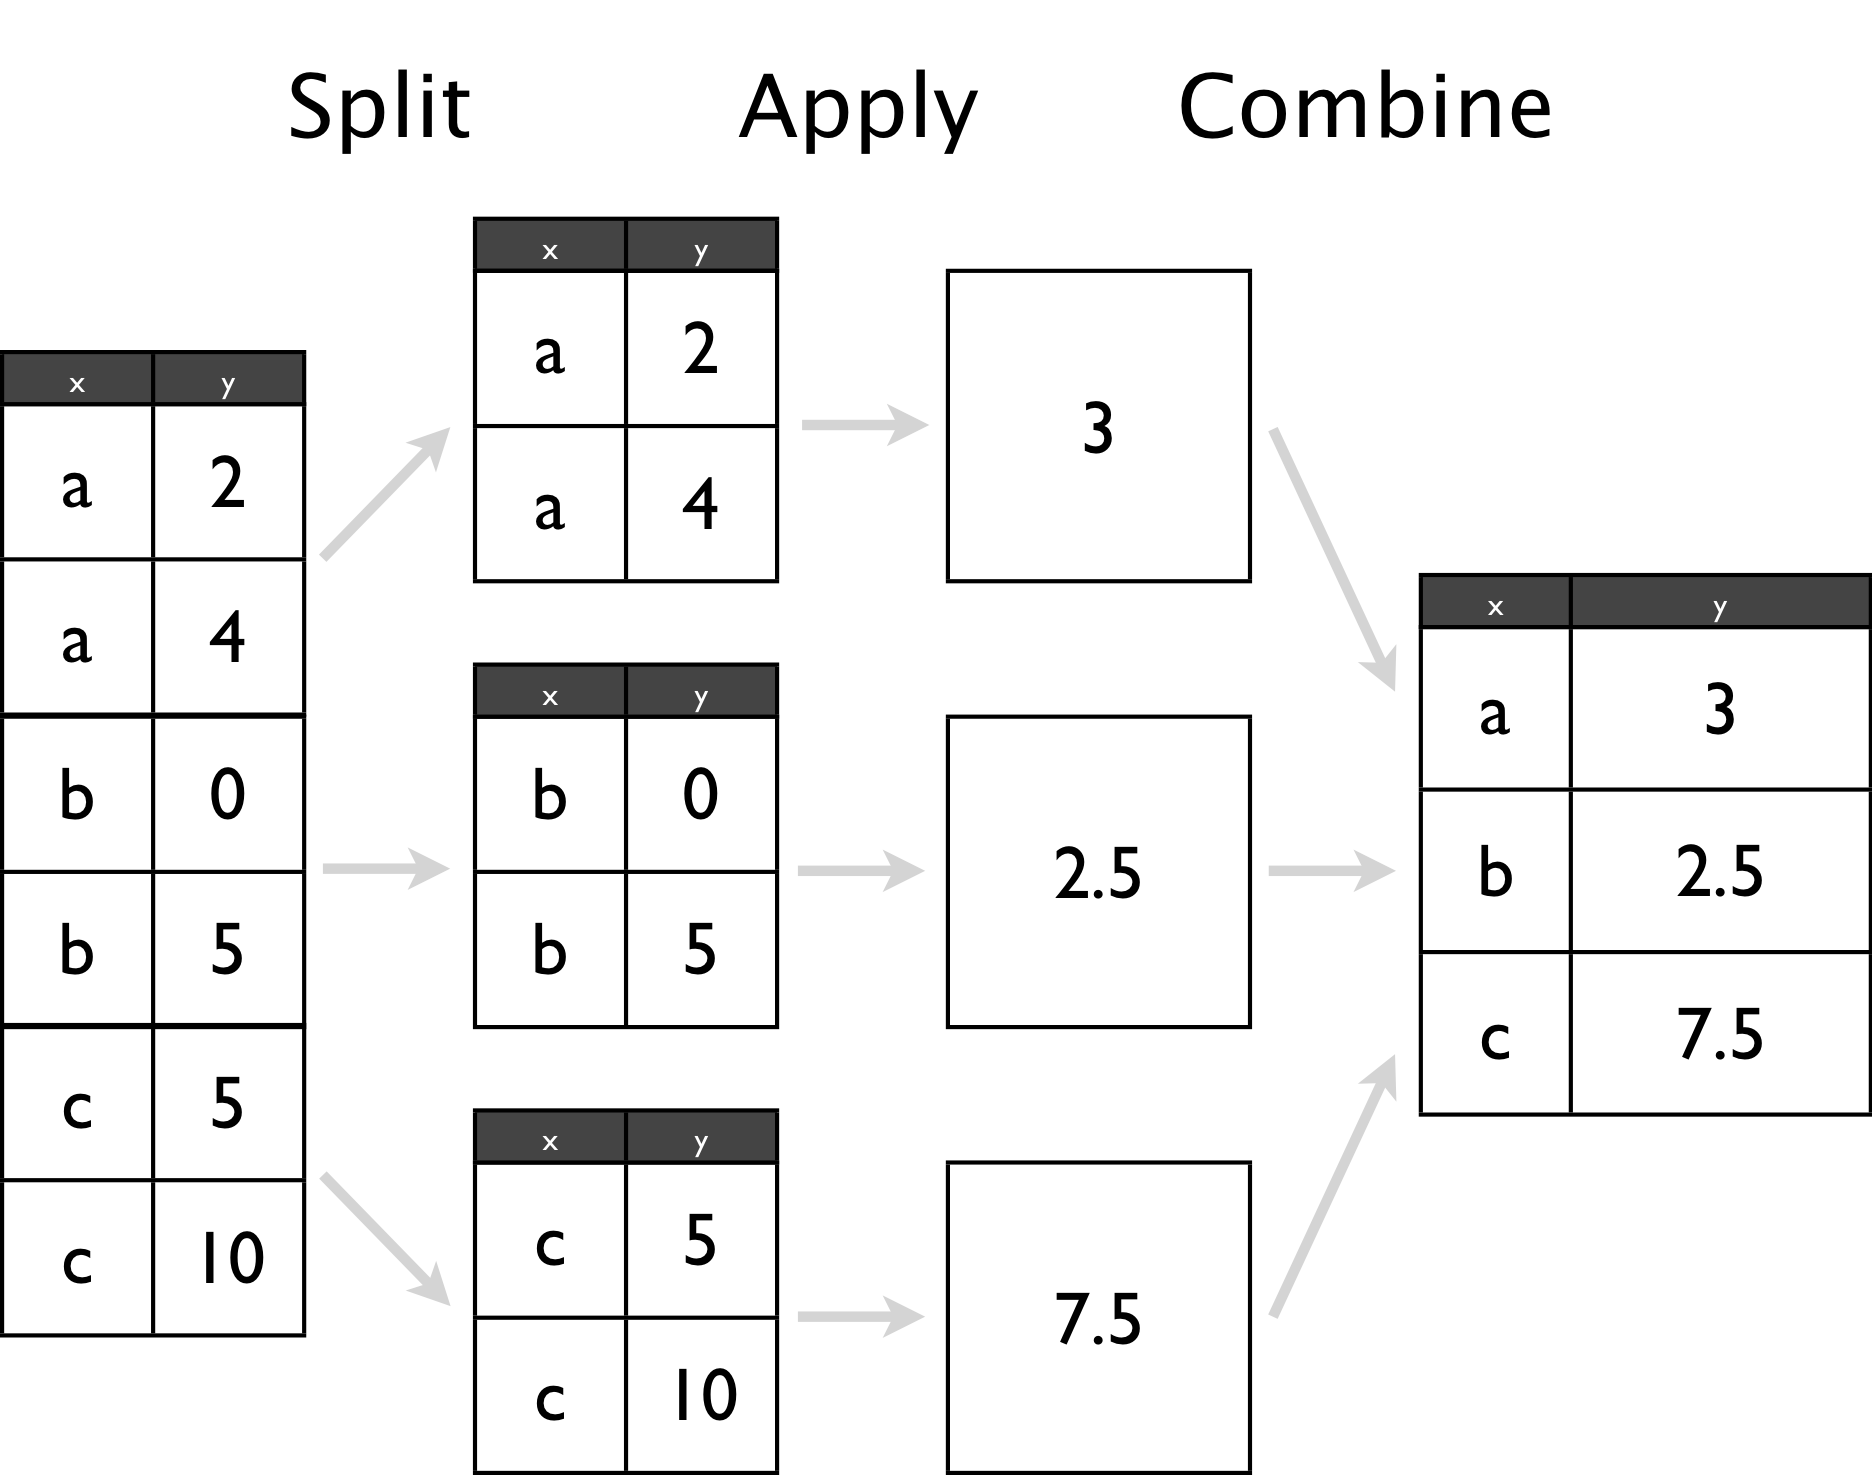

In [25]:
Image(filename='images/split-apply-combine.png', width=500)

In [26]:
sst = dset[['sst']]

In [27]:
clim = sst.groupby('time.month').mean('time')

In [28]:
clim[['sst']]

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, month: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

### the plot method accepts parameters allowing to fo facetted plots 

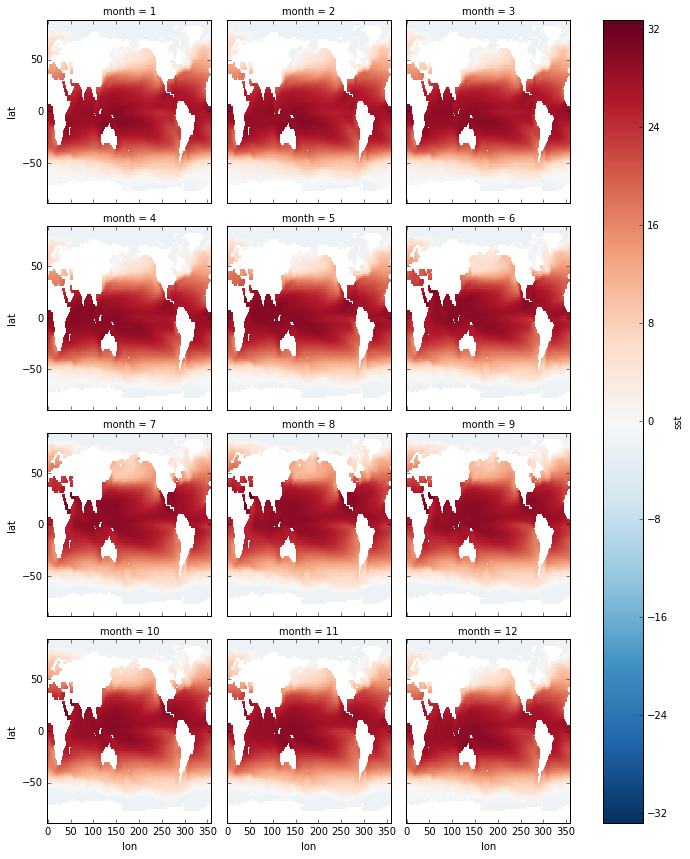

In [29]:
clim['sst'].plot(x='lon', y='lat', col='month', col_wrap=3)

### to plot in on a proper map, use basemap

In [30]:
from calendar import month_name

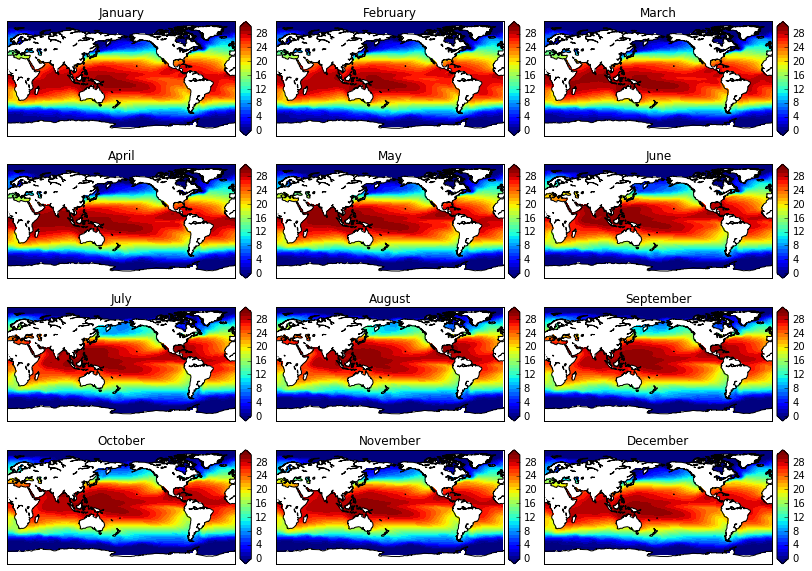

In [31]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(range(1,13)): 
    ax = axes[i]
    plot_field(clim['sst'][i,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=month_name[month])
f.savefig('./images/clim_sst.png')

**NOTE**: If you have **DAILY** data, you can calculate a daily climatology using the `dayofyear` attribute, e.g.: 
    
```python 

clim = dset.groupby('time.dayofyear').mean('time')

```

### New in version 0.4 (RC1 at 27/02/2015): calculates a seasonal (DJF, MAM, ...) climatology

In [32]:
seas_clim = sst.groupby('time.season').mean('time')

In [33]:
seas_clim

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

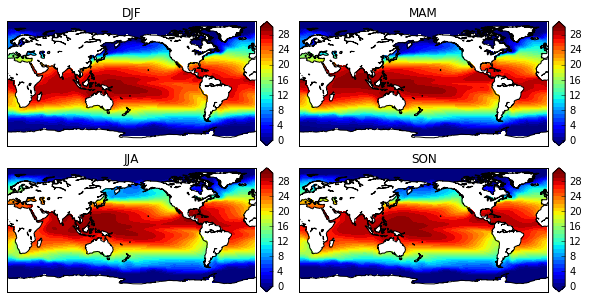

In [34]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=seas)
f.savefig('./images/seas_clim_sst.png')

### calculates seasonal averages weigthed by the number of days in each month

adapted from [http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example](http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example)

In [35]:
def get_dpm(time):
    """
    return a array of days per month corresponding to the months provided in `time`
    """
    import calendar as cal
    month_length = np.zeros(len(time), dtype=np.float)

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal.monthrange(year, month)[1]
    return month_length

In [39]:
def season_mean(ds, calendar='standard'):
    # Make a DataArray of season/year groups
    year_season = xr.DataArray(ds.time.to_index().to_period(freq='Q-NOV').to_timestamp(how='E'),
                                 coords=[ds.time], name='year_season')

    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = xr.DataArray(get_dpm(ds.time.to_index()),
                                  coords=[ds.time], name='month_length')
    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [40]:
sst_seas = season_mean(sst)

In [41]:
sst_seas

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

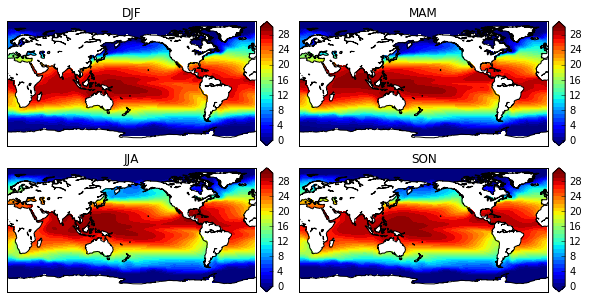

In [45]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].data): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].data, lats, lons, 0, 30, 1, ax=ax, title=seas)
f.savefig('./images/seas_clim_sst.png')

#### difference between non-weigthed and weighted seasonal climatologies

In [46]:
diff_seas = seas_clim - sst_seas

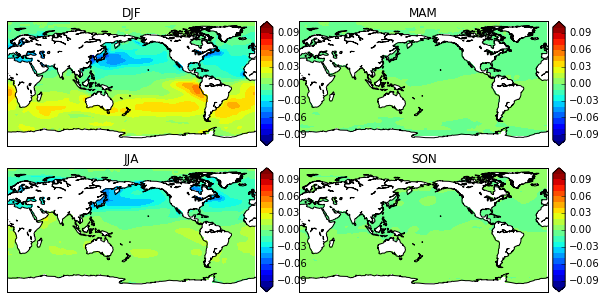

In [49]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(diff_seas['sst'][i,:,:].data, lats, lons, -0.1, 0.1, 0.01, ax=ax, title=seas)

### calculates anomalies with respect to a specific climatological *normal*

#### 1. defines the function

In [50]:
def demean(x): 
    return x - x.sel(time=slice('1981-1-15','2010-12-15')).mean('time')

#### 2. apply the function to the groupby object

In [63]:
#sst_anoms = dset.groupby('time.month').apply(demean)

# or (will return a xray.DataArray)

sst_anoms = dset['sst'].groupby('time.month').apply(demean) 

#### should be very similar to the original anomalies

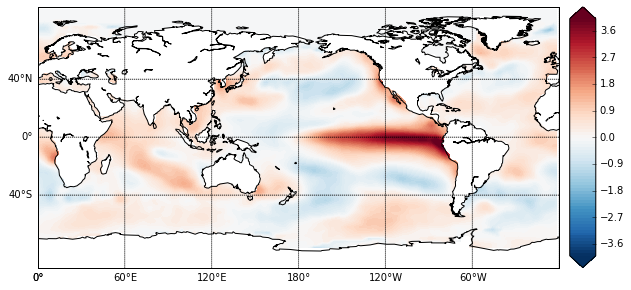

In [52]:
plot_field(sst_anoms.sel(time=('1998-1-15')), lats, lons, -4, 4, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

### Creates a xray dataset object from numpy arrays

In [72]:
lon = np.linspace(0, 357.5, 144, endpoint=True)
lat = np.linspace(-90,90, 73, endpoint=True)

lons, lats = np.meshgrid(lon,lat)

lev = np.array([1000,925,850])
time = pd.date_range(start='2015-1-1',end='2015-1-3')

In [73]:
lat

array([-90. , -87.5, -85. , -82.5, -80. , -77.5, -75. , -72.5, -70. ,
       -67.5, -65. , -62.5, -60. , -57.5, -55. , -52.5, -50. , -47.5,
       -45. , -42.5, -40. , -37.5, -35. , -32.5, -30. , -27.5, -25. ,
       -22.5, -20. , -17.5, -15. , -12.5, -10. ,  -7.5,  -5. ,  -2.5,
         0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ])

In [74]:
arr = np.random.randn(3,3,73,144)

The dictionnary **keys** are the **variables** contained in the Dataset.<br><br>
The Dictionnary **values** are **tuples**, with first the (or the list of) dimension(s) over which the array varies, then the array itself

In [75]:
d = {}
d['time'] = ('time',time)
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['level'] = ('level', lev)
d['var'] = (['time','level','latitudes','longitudes'], arr)

In [77]:
dset = xr.Dataset(d)

adding global attributes

In [78]:
dset.attrs['author'] = 'nicolas.fauchereau@gmail.com'

adding variables attributes

In [79]:
dset.longitudes.attrs['units'] = 'degrees_east'
dset.latitudes.attrs['units'] = 'degrees_north'

In [80]:
dset.sel(time='2015-1-2', level=1000)

<xarray.Dataset>
Dimensions:     (latitudes: 73, longitudes: 144)
Coordinates:
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
    level       int64 1000
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 ...
    time        datetime64[ns] 2015-01-02
Data variables:
    var         (latitudes, longitudes) float64 -0.1176 1.952 -0.6127 ...
Attributes:
    author: nicolas.fauchereau@gmail.com

In [81]:
lons, lats = np.meshgrid(dset['longitudes'], dset['latitudes'])

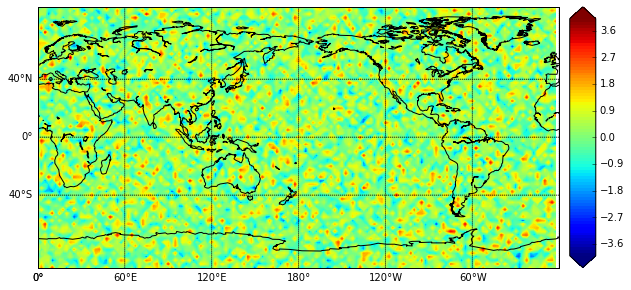

In [82]:
plot_field(dset.sel(time='2015-1-2', level=1000)['var'], \
           lats, lons, -4, 4, 0.1, grid=True)

In [83]:
dset.to_netcdf('../data/dset_from_dict.nc')

In [85]:
!/usr/local/bin/ncdump -h ../data/dset_from_dict.nc

netcdf dset_from_dict {
dimensions:
	longitudes = 144 ;
	level = 3 ;
	latitudes = 73 ;
	time = 3 ;
variables:
	double longitudes(longitudes) ;
		longitudes:units = "degrees_east" ;
	int64 level(level) ;
	double latitudes(latitudes) ;
		latitudes:units = "degrees_north" ;
	double var(time, level, latitudes, longitudes) ;
	int64 time(time) ;
		time:units = "days since 2015-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;

// global attributes:
		:_NCProperties = "version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17" ;
		:author = "nicolas.fauchereau@gmail.com" ;
}


### Creates a xray dataset object from a Pandas DataFrame

In [86]:
import string
df = pd.DataFrame(np.random.randn(365,5), \
                  index=pd.date_range(start='2014-1-1', periods=365), \
                  columns=list(string.ascii_letters[:5]))

In [87]:
df.head()

,a,b,c,d,e
2014-01-01,-1.004678,-0.446391,0.234738,1.488121,-0.188044
2014-01-02,2.293173,0.218556,-1.271302,0.449778,-0.630905
2014-01-03,-1.789099,-0.287331,-0.149581,-0.644714,0.645825
2014-01-04,-0.515974,0.853006,-0.770559,0.692165,1.493585
2014-01-05,1.316950,0.779875,0.979882,-0.156365,-0.612362


#### from DataFrame

In [88]:
df_ds = xr.Dataset.from_dataframe(df)

In [89]:
df_ds

<xarray.Dataset>
Dimensions:  (index: 365)
Coordinates:
  * index    (index) datetime64[ns] 2014-01-01 2014-01-02 2014-01-03 ...
Data variables:
    a        (index) float64 -1.005 2.293 -1.789 -0.516 1.317 -1.837 1.513 ...
    b        (index) float64 -0.4464 0.2186 -0.2873 0.853 0.7799 -0.3154 ...
    c        (index) float64 0.2347 -1.271 -0.1496 -0.7706 0.9799 -0.6123 ...
    d        (index) float64 1.488 0.4498 -0.6447 0.6922 -0.1564 0.1525 ...
    e        (index) float64 -0.188 -0.6309 0.6458 1.494 -0.6124 -1.597 ...

In [90]:
group = df_ds.groupby('index.month').mean('index')

In [91]:
group

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    d        (month) float64 -0.2539 -0.1754 -0.1515 -0.1012 -0.1154 0.05532 ...
    c        (month) float64 -0.273 -0.1676 -0.001279 0.2252 -0.02417 ...
    b        (month) float64 0.1412 0.07768 0.3354 -0.5481 -0.1417 -0.101 ...
    e        (month) float64 -0.1168 -0.02433 0.2474 0.3878 -0.1547 -0.1472 ...
    a        (month) float64 -0.03201 0.1343 0.02925 0.08649 -0.2398 0.02187 ...

#### converts TO a Pandas.DataFrame

In [92]:
group_df = group.to_dataframe()

In [93]:
group_df.reindex_axis(list(string.ascii_letters[:5]), axis=1).head()

,a,b,c,d,e
month,,,,,
1,-0.032011,0.141164,-0.272966,-0.253876,-0.116781
2,0.134278,0.077680,-0.167583,-0.175395,-0.024326
3,0.029252,0.335366,-0.001279,-0.151482,0.247424
4,0.086486,-0.548096,0.225239,-0.101236,0.387791
5,-0.239778,-0.141744,-0.024174,-0.115432,-0.154700


In [94]:
df.groupby(df.index.month).mean().head()

,a,b,c,d,e
1,-0.032011,0.141164,-0.272966,-0.253876,-0.116781
2,0.134278,0.077680,-0.167583,-0.175395,-0.024326
3,0.029252,0.335366,-0.001279,-0.151482,0.247424
4,0.086486,-0.548096,0.225239,-0.101236,0.387791
5,-0.239778,-0.141744,-0.024174,-0.115432,-0.154700


### Opening a file throught the network with openDAP

In [95]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.mean.nc'

In [96]:
olr_dset = xr.open_dataset(url)

In [97]:
olr_dset.time[-1]

<xarray.DataArray 'time' ()>
numpy.datetime64('2013-12-01T00:00:00.000000000')
Coordinates:
    time     datetime64[ns] ...
Attributes:
    long_name: Time
    actual_range: [ 1528872.  1875144.]
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    standard_name: time
    axis: T

#### the dataset is not loaded in memory until one _selects_ something

In [98]:
olr_sub = olr_dset.sel(time='1998-1-1',lat=slice(30,-30), lon=slice(170, 300))

In [99]:
olr_sub

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lon      (lon) float32 170.0 172.5 175.0 177.5 180.0 182.5 185.0 187.5 ...
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 17.5 15.0 12.5 10.0 7.5 ...
    time     datetime64[ns] 1998-01-01
Data variables:
    olr      (lat, lon) float64 ...
Attributes:
    title: Monthly means of OLR from interpolated OLR dataset
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    platform: Observation
    Conventions: CF-1.2
    References: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    Citation: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. Bulle

In [100]:
m = bm(projection='merc',llcrnrlat=-30,urcrnrlat=30,\
            llcrnrlon=170,urcrnrlon=300,\
            lat_ts=0,resolution='c')

In [101]:
lons, lats = np.meshgrid(olr_sub['lon'], olr_sub['lat'])

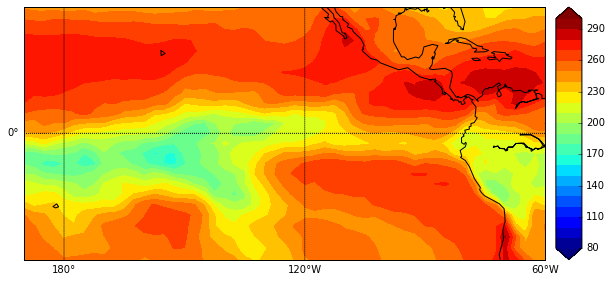

In [102]:
plot_field(olr_sub['olr'].values, lats, lons, 80, 300, 10, grid=True)

In [105]:
name = 'xarray'
!jupyter nbconvert {name}.ipynb --to html

[NbConvertApp] Converting notebook xarray.ipynb to html
[NbConvertApp] Writing 2220664 bytes to xarray.html
